# 66310837
# นายจิรัฐ ฟองดา

In [1]:
import numpy as np
import numpy.linalg as la
import scipy.linalg as sla
import scipy.sparse as sparse

import matplotlib.pyplot as plt
from PIL import Image
from time import time

import seaborn as sns
sns.set(font_scale=2)
plt.style.use('seaborn-v0_8-whitegrid')

# plt.style.use('bmh')
# plt.style.use('dark_background')
# plt.style.use('fivethirtyeight')

In [2]:
img =Image.open('ssn.png')
xmat = (255-np.array(img).max(axis=2))/255

In [3]:
print(xmat.shape)
print(xmat.min(), xmat.max())

(40, 100)
0.0 1.0


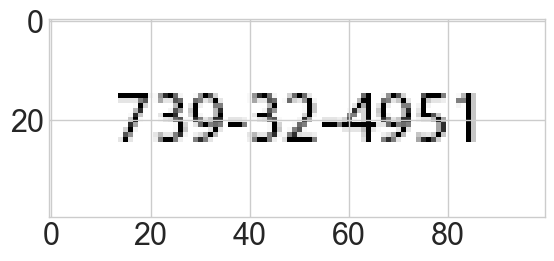

In [4]:
plt.imshow(xmat)

In [5]:
x = xmat.flatten()
print(x.shape)

(4000,)


In [6]:
def blur_operator(m, n, radius):
    imat, jmat = np.meshgrid(np.arange(m), np.arange(n), indexing='ij')
    ivec = np.atleast_2d(imat.flatten())
    jvec = np.atleast_2d(jmat.flatten())
    A = np.fmax(0, 1 - np.sqrt((ivec.T - ivec)**2 + (jvec.T - jvec)**2)/radius)
    A /= A.sum(axis=1)
    return A

In [7]:
A = blur_operator(xmat.shape[0], xmat.shape[1], 5)
A.shape

(4000, 4000)

In [8]:
b = A@x
b.shape

(4000,)

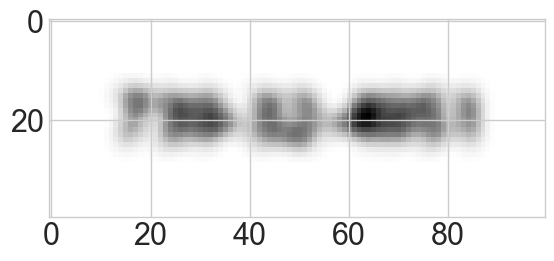

In [9]:
b2D = b.reshape(xmat.shape)
plt.imshow(b2D)

In [10]:
x_solve1 = la.solve(A, b)
x_solve1.shape

(4000,)

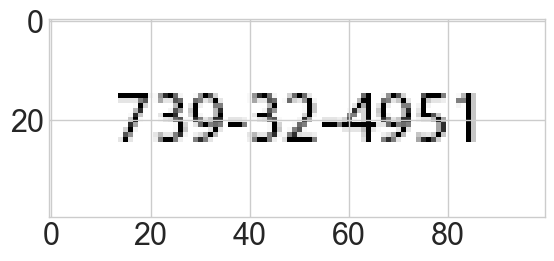

In [11]:
plt.imshow(x_solve1.reshape(xmat.shape))

In [12]:
xx = la.inv(A)@b
np.isclose(xx, x_solve1, rtol=1e-05, atol=1e-08, equal_nan=False).sum() # ค่าในแต่ละเมทริกใกล้เคียงกันไหม

np.int64(4000)

In [13]:
b_noisy = b + 1e-05*np.random.rand(b.size)
x_noisy = la.solve(A, b)

In [14]:
M1 = np.array([[2,0,0,0], [3,2,0,0], [1,2,6,0], [1,3,4,2]])
b1 = np.array([2, 2, 6, 4])

In [15]:
M1

array([[2, 0, 0, 0],
       [3, 2, 0, 0],
       [1, 2, 6, 0],
       [1, 3, 4, 2]])

In [16]:
def my_forward_substitution(M, b):
    n = len(b)
    y = np.zeros(n)
    for i in range(n):
        tmp = b[i]
        for j in range(i):
            tmp -= y[j]*M[i, j]
        y[i] = tmp/M[i, i]
    return y

In [17]:
my_forward_substitution(M1, b1)

array([ 1.  , -0.5 ,  1.  ,  0.25])

In [18]:
sla.solve_triangular(M1, b1, lower=True)

array([ 1.  , -0.5 ,  1.  ,  0.25])

In [19]:
M2 = np.array([[2,8,4,2],[0,4,4,3],[0,0,6,2],[0,0,0,2]])
b2 = np.array([2,4,4,1])

In [20]:
M2

array([[2, 8, 4, 2],
       [0, 4, 4, 3],
       [0, 0, 6, 2],
       [0, 0, 0, 2]])

In [21]:
def my_backward_substitution(M, b):
    n = len(b)
    y = np.zeros(n)
    for i in range(n-1, -1, -1):
        tmp = b[i]
        for j in range(i+1, n):
            tmp -= y[j]*M[i,j]
        y[i] = tmp/M[i,i]
    return y

In [22]:
my_backward_substitution(M2, b2)

array([-1.   ,  0.125,  0.5  ,  0.5  ])

In [23]:
sla.solve_triangular(M2, b2)

array([-1.   ,  0.125,  0.5  ,  0.5  ])